In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from string import punctuation
import json

In [2]:
file_name = 'test_set_002.csv'

data = pd.read_csv(file_name, delimiter=',')

print(data.shape)
data.head(5)

(26861, 3)


,defs,word,len
0,колпак на лампе,абажур,15
1,настоятель католического монастыря,аббат,34
2,католический священник,аббат,22
3,католический монастырь,аббатство,22
4,слово из первых букв,аббревиатура,20


In [3]:
import spacy


nlp = spacy.load('ru2')
nlp.add_pipe(nlp.create_pipe('sentencizer'), first=True)

In [4]:
entries = ['POS', 'freq', 'example', 'isBigram']

frequences = {}
examples = {}
isBigram = {}

for text in data['defs']:
    text = ''.join(x for x in text if x not in punctuation)
    doc = nlp(text)
    for i in range(len(doc)):
        word = doc[i]
        pos_tag = word.pos_
        if pos_tag not in frequences:
            examples[pos_tag] = word.lemma_
            isBigram[pos_tag] = False
        frequences[pos_tag] = frequences[pos_tag] + 1 if pos_tag in frequences else 1
        j = i + 1
        if j < len(doc):
            bigram_pos_tag = pos_tag + "+" + doc[j].pos_
            if bigram_pos_tag not in frequences:
                examples[bigram_pos_tag] = word.lemma_ + " " + doc[j].lemma_
                isBigram[bigram_pos_tag] = True
            frequences[bigram_pos_tag] = frequences[bigram_pos_tag] + 1 if bigram_pos_tag in frequences else 1

array = [[k, v, examples[k], isBigram[k]] for k,v in frequences.items()]
        
df = pd.DataFrame(data = array, columns = entries)
df_sorted = df.sort_values('freq', ascending=False)

In [5]:
df_sorted.head()

,POS,freq,example,isBigram
0,NOUN,99465,колпак,False
5,ADJ,37989,католический,False
8,NOUN+NOUN,29152,искажение изображение,True
6,ADJ+NOUN,26193,католический монастырь,True
2,ADP,21904,на,False


In [6]:
df_sorted = df_sorted.loc[df_sorted['POS'] != 'SPACE']

In [7]:
df_sorted.head(10)

,POS,freq,example,isBigram
0,NOUN,99465,колпак,False
5,ADJ,37989,католический,False
8,NOUN+NOUN,29152,искажение изображение,True
6,ADJ+NOUN,26193,католический монастырь,True
2,ADP,21904,на,False
9,VERB,15374,поступать,False
1,NOUN+ADP,13882,колпак на,True
3,ADP+NOUN,13580,на лампе,True
4,NOUN+ADJ,11735,настоятель католический,True
22,CCONJ,10513,и,False


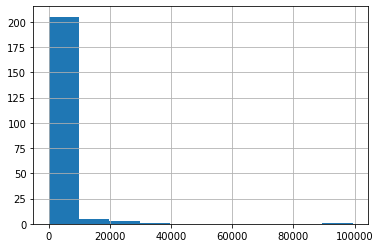

In [8]:
h = df_sorted['freq'].hist()
fig = h.get_figure()

In [9]:
data_pos = df_sorted.loc[df_sorted['isBigram'] == False]
data_bigram_pos = df_sorted.loc[df_sorted['isBigram'] == True]

In [10]:
data_pos.head()

,POS,freq,example,isBigram
0,NOUN,99465,колпак,False
5,ADJ,37989,католический,False
2,ADP,21904,на,False
9,VERB,15374,поступать,False
22,CCONJ,10513,и,False


In [11]:
data_bigram_pos.head(20)

,POS,freq,example,isBigram
8,NOUN+NOUN,29152,искажение изображение,True
6,ADJ+NOUN,26193,католический монастырь,True
1,NOUN+ADP,13882,колпак на,True
3,ADP+NOUN,13580,на лампе,True
4,NOUN+ADJ,11735,настоятель католический,True
21,NOUN+CCONJ,7672,течении и,True
14,NOUN+VERB,7313,книга выдаваться,True
25,ADJ+ADJ,5476,классический академичный,True
23,CCONJ+NOUN,5236,и тонна,True
19,VERB+NOUN,5133,поглощать вода,True


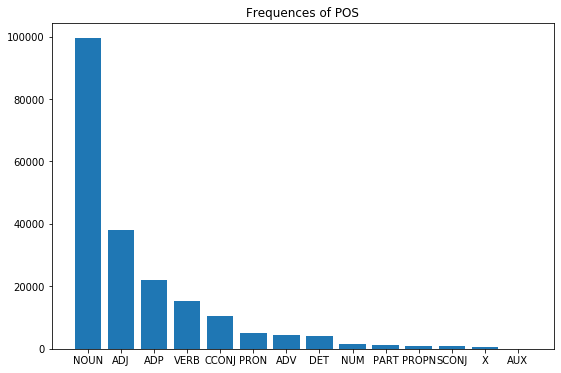

In [12]:
x = data_pos['POS']
y = data_pos['freq']

fig, ax = plt.subplots()

plt.title('Frequences of POS')

ax.bar(x, y)

fig.set_figwidth(9)
fig.set_figheight(6)

plt.show()

In [13]:
data_bigram_pos.shape

(201, 4)

In [14]:
data_bigram_pos['freq'].median()

52.0

In [15]:
np.percentile(data_bigram_pos['freq'], 90)

1356.0

In [16]:
data_bigram_pos = data_bigram_pos.loc[data_bigram_pos['freq'] >= 1356]

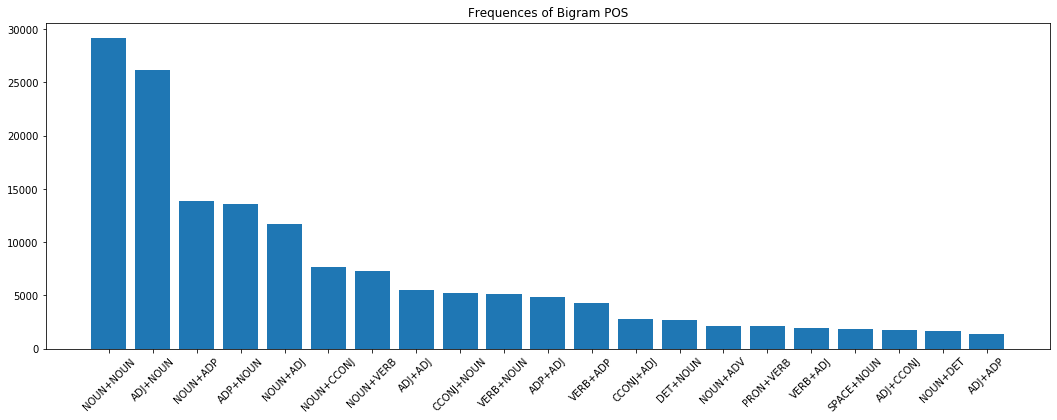

In [17]:
x = data_bigram_pos['POS']
y = data_bigram_pos['freq']

fig, ax = plt.subplots()

plt.title('Frequences of Bigram POS')

ax.bar(x, y)

ax.set_xticklabels(x, rotation = 45)  

fig.set_figwidth(18)
fig.set_figheight(6)

plt.show()